In [1]:
## setup ##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import patsy 
from patsy import dmatrices
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# 1: Load the data from the Excel file 'airlines.xlsx' into a DataFrame named df_data.
df_data = pd.read_excel('airlines.xlsx')
display(df_data)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
# 2: Remove any rows that contain missing values to ensure a clean dataset.
df_data.dropna(inplace=True)

In [4]:
# 3: Verify that there are no remaining null values in df_data.
assert df_data.isnull().sum().sum() == 0, "Null exists"

In [5]:
# 4: Convert the 'Date_of_Journey', 'Dep_Time', and 'Arrival_Time' columns from strings to datetime objects.
df_data['Date_of_Journey'] = pd.to_datetime(df_data['Date_of_Journey'], format='%d/%m/%Y')
df_data['Dep_Time'] = pd.to_datetime(df_data['Dep_Time'])
df_data['Arrival_Time'] = pd.to_datetime(df_data['Arrival_Time'])
display(df_data)

/var/folders/yq/_903dtr16v7dt5zpq3gcggnh0000gn/T/ipykernel_80567/4282272241.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_data['Dep_Time'] = pd.to_datetime(df_data['Dep_Time'])
/var/folders/yq/_903dtr16v7dt5zpq3gcggnh0000gn/T/ipykernel_80567/4282272241.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_data['Arrival_Time'] = pd.to_datetime(df_data['Arrival_Time'])


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-05-22 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-05-22 05:50:00,2024-05-22 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-05-22 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-05-22 18:05:00,2024-05-22 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-05-22 16:50:00,2024-05-22 21:35:00,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,2024-05-22 19:55:00,2024-05-22 22:25:00,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2024-05-22 20:45:00,2024-05-22 23:20:00,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2024-05-22 08:20:00,2024-05-22 11:20:00,3h,non-stop,No info,7229
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,2024-05-22 11:30:00,2024-05-22 14:10:00,2h 40m,non-stop,No info,12648


In [6]:
# 5: Create new columns for the day, month, and year of the journey, as well as the hour and minute of the departure and arrival times.
df_data['Journey_day'] = df_data['Date_of_Journey'].dt.day
df_data['Journey_month'] = df_data['Date_of_Journey'].dt.month
df_data['Journey_year'] = df_data['Date_of_Journey'].dt.year
df_data['Dep_Time_hour'] = df_data['Dep_Time'].dt.hour
df_data['Dep_Time_minute'] = df_data['Dep_Time'].dt.minute
df_data['Arrival_Time_hour'] = df_data['Arrival_Time'].dt.hour
df_data['Arrival_Time_minute'] = df_data['Arrival_Time'].dt.minute
display(df_data)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-05-22 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-05-22 05:50:00,2024-05-22 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-05-22 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-05-22 18:05:00,2024-05-22 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-05-22 16:50:00,2024-05-22 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,2024-05-22 19:55:00,2024-05-22 22:25:00,2h 30m,non-stop,No info,4107,9,4,2019,19,55,22,25
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2024-05-22 20:45:00,2024-05-22 23:20:00,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2024-05-22 08:20:00,2024-05-22 11:20:00,3h,non-stop,No info,7229,27,4,2019,8,20,11,20
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,2024-05-22 11:30:00,2024-05-22 14:10:00,2h 40m,non-stop,No info,12648,1,3,2019,11,30,14,10


In [7]:
# 6: Create a new column 'dep_description' that categorizes the departure time into different parts of the day.
def classify_departure(hour):
    if 4 <= hour < 8: return "Early Morning"
    elif 8 <= hour < 12: return "Morning"
    elif 12 <= hour < 16: return "Noon"
    elif 16 <= hour < 20: return "Evening"
    elif 20 <= hour < 24: return "Night"
    else: return "Late Nigth"
df_data['dep_description'] = df_data['Dep_Time_hour'].apply(classify_departure)
display(df_data['dep_description'])

0                Night
1        Early Morning
2              Morning
3              Evening
4              Evening
             ...      
10678          Evening
10679            Night
10680          Morning
10681          Morning
10682          Morning
Name: dep_description, Length: 10682, dtype: object

In [8]:
# 7 ? does not exist

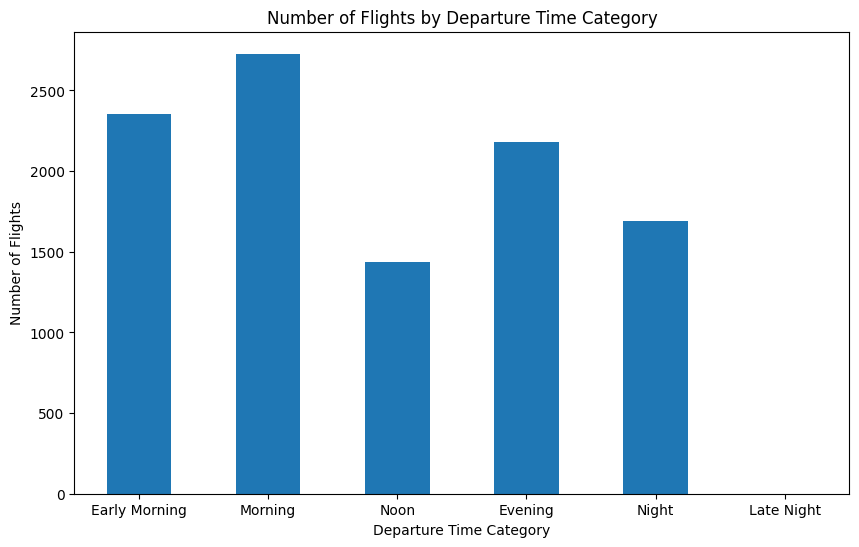

In [9]:
# 8: Plot a bar chart showing the number of flights for each departure time category.
departure_counts = df_data['dep_description'].value_counts().reindex(["Early Morning", "Morning", "Noon", "Evening", "Night", "Late Night"], fill_value=0)
plt.figure(figsize=(10,6))
departure_counts.plot(kind='bar')
plt.title('Number of Flights by Departure Time Category')
plt.xlabel('Departure Time Category')
plt.ylabel('Number of Flights')
plt.xticks(rotation=0)
plt.show()

In [10]:
# 9: Create three new columns to represent the duration of the flights in hours, minutes, and total minutes.
def extract_duration(duration):
    hours, minutes = 0, 0
    if 'h' in duration:
        hours = int(duration.split('h')[0])
        duration = duration.split('h')[1]
    if 'm' in duration: minutes = int(duration.split('m')[0])
    return hours, minutes
df_data[['Duration_hours', 'Duration_mins']] = df_data['Duration'].apply(lambda x: pd.Series(extract_duration(x)))
df_data['Duration_total_mins'] = df_data['Duration_hours'] * 60 + df_data['Duration_mins']

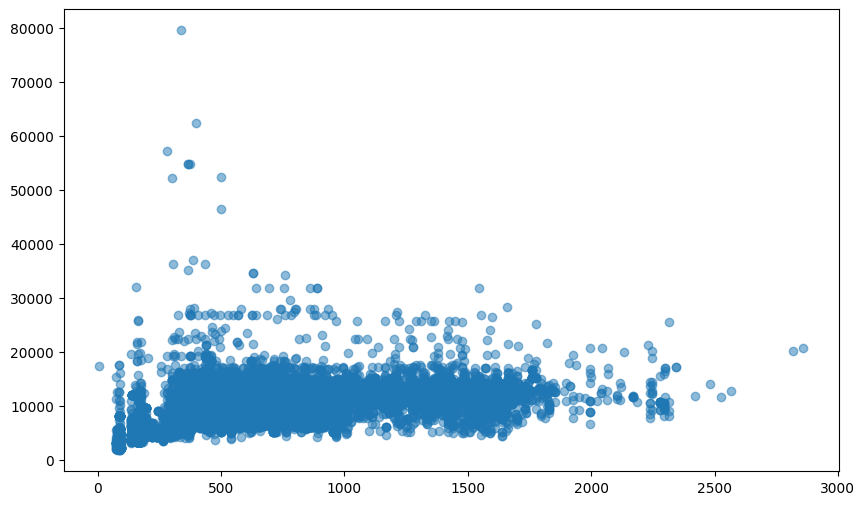

In [11]:
# 10: Create a scatter plot of flight duration (in minutes) against flight price.
plt.figure(figsize=(10,6))
plt.scatter(df_data['Duration_total_mins'], df_data['Price'], alpha=0.5, label='Data Points')

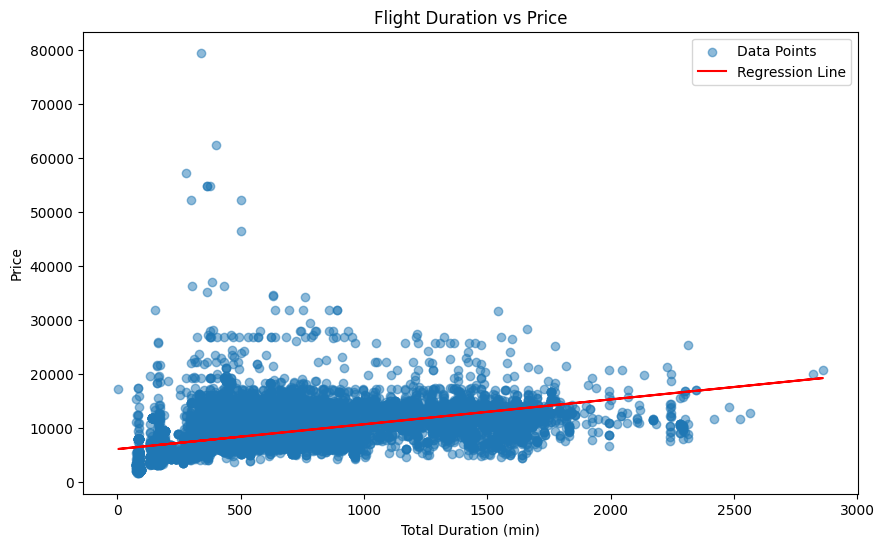

Regression Line Equation: Price = 4.60 * Duration_total_mins + 6129.78


In [12]:
# 11: Fit a simple linear regression line to the scatter plot using numpy.polyfit and analyze the results.
plt.figure(figsize=(10,6))
plt.scatter(df_data['Duration_total_mins'], df_data['Price'], alpha=0.5, label='Data Points')
slope, intercept = np.polyfit(df_data['Duration_total_mins'], df_data['Price'], 1)
regression_line = slope * df_data['Duration_total_mins'] + intercept
plt.plot(df_data['Duration_total_mins'], regression_line, color='red', label='Regression Line')
plt.title('Flight Duration vs Price')
plt.xlabel('Total Duration (min)')
plt.ylabel('Price')
plt.legend()
plt.show()
print(f"Regression Line Equation: Price = {slope:.2f} * Duration_total_mins + {intercept:.2f}")

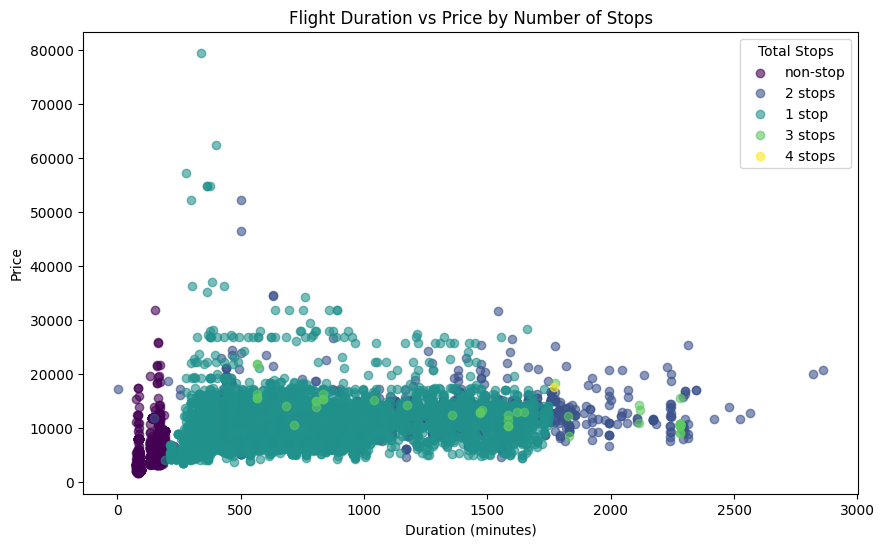

The distrbution of flight durations and prices for different numbers of stops, but the majority of flights have only one stop.


In [13]:

# 12: Create a scatter plot of flight duration against price, colored by the number of stops.
unique_stops = df_data['Total_Stops'].unique()
color_map = plt.cm.viridis(np.linspace(0, 1, len(unique_stops)))
plt.figure(figsize=(10,6))
for stop, color in zip(unique_stops, color_map):
    subset = df_data[df_data['Total_Stops'] == stop]
    plt.scatter(subset['Duration_total_mins'], subset['Price'], label=stop, alpha=0.6, color=color)
plt.title('Flight Duration vs Price by Number of Stops')
plt.xlabel('Duration (minutes)')
plt.ylabel('Price')
plt.legend(title='Total Stops')
plt.show()
print("The distrbution of flight durations and prices for different numbers of stops, but the majority of flights have only one stop.")


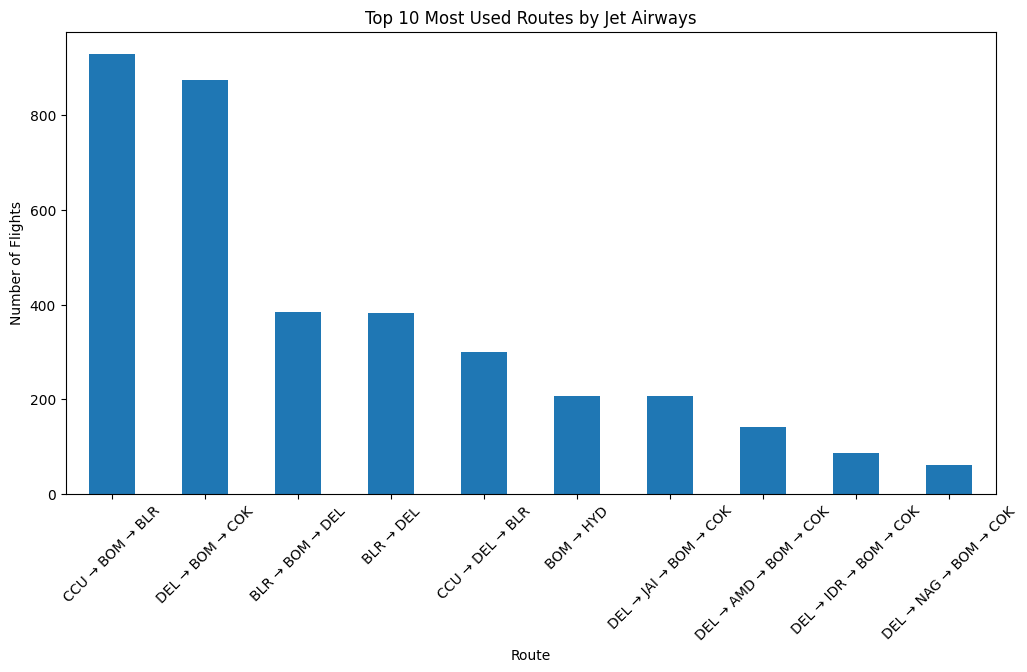

In [14]:
# 13: Identify the most frequently used routes by Jet Airways and visualize the top 10 routes in a bar chart.
jet_airways_routes = df_data[df_data['Airline'] == 'Jet Airways']['Route'].value_counts().head(10)
plt.figure(figsize=(12,6))
jet_airways_routes.plot(kind='bar')
plt.title('Top 10 Most Used Routes by Jet Airways')
plt.xlabel('Route')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()

In [15]:
# 14: Perform linear regression using patsy and sklearn on the formula 'Price ~ Duration_total_mins' and evaluate the model's performance.
y, X = dmatrices('Price ~ Duration_total_mins -1', data=df_data, return_type='dataframe')
simple_model = LinearRegression()
simple_model.fit(X, y)
y_pred = simple_model.predict(X)
simple_r2 = r2_score(y, y_pred)
print(f'R² score for Price ~ Duration_total_mins: {simple_r2:.3f}')
print("The R² score indicates the proportion of variance in the price that can be explained by the duration of the flight. The obtained score is 0.257, which suggests a moderate correlation.")


R² score for Price ~ Duration_total_mins: 0.257
The R² score indicates the proportion of variance in the price that can be explained by the duration of the flight. The obtained score is 0.257, which suggests a moderate correlation.


In [16]:
# 15: Implement a linear regression model using patsy and sklearn with a more complex formula and evaluate its performance.
formula = "Price ~ Airline + Source + Destination + Total_Stops + C(Journey_month) + Journey_day -1"
y, X = dmatrices(formula, data=df_data, return_type='dataframe')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
simplified_model = LinearRegression()
simplified_model.fit(X_train, y_train)
training_score = simplified_model.score(X_train, y_train)
print(f'R² score on training set: {training_score:.3f}')
print('Model coefficients:', simplified_model.coef_[0])
print('Model intercept:', simplified_model.intercept_[0])

R² score on training set: 0.638
Model coefficients: [-5.12413165e+03 -3.42828659e+03 -4.96040378e+03 -4.92129619e+03
 -9.02985084e+02  4.23466465e+04 -1.78726726e+03 -1.85622848e+03
 -5.21661355e+03 -8.59934389e+03 -3.13046198e+03 -2.41962805e+03
 -5.78948680e+01  2.74875529e+01  7.15793808e+01 -8.30267966e+02
  2.74875529e+01 -2.00165942e+02 -8.30267966e+02 -5.78948680e+01
  9.89261842e+02  2.35844812e+03  3.43959022e+03  5.33188483e+03
 -3.13272213e+03 -2.57539525e+03 -1.28399635e+03 -1.77755597e+03
 -7.86520192e+01]
Model intercept: 14871.791937290513


In [17]:

# 16: Try a different model to see if you have a better r2. Write your comments about the result, and compare this result with the one in the previous exercise.
alternative_formula = 'Price ~ Duration_total_mins + Airline + Source + Destination + Total_Stops -1'
y, X = dmatrices(alternative_formula, data=df_data, return_type='dataframe')
alternative_model = LinearRegression()
alternative_model.fit(X, y)
y_pred_alternative = alternative_model.predict(X)
alternative_r2 = r2_score(y, y_pred_alternative)
print(f'R² score for alternative model: {alternative_r2:.3f}')
print("The alternative model, which includes more variables, achieves an R² score of 0.601, indicating a significantly better fit compared to the simpler model. This suggests that these additional variables have a substantial impact on the price of flights.")

R² score for alternative model: 0.601
The alternative model, which includes more variables, achieves an R² score of 0.601, indicating a significantly better fit compared to the simpler model. This suggests that these additional variables have a substantial impact on the price of flights.
